(array([17532., 17897., 18262., 18628., 18993., 19358., 19723., 20089.]),
 [Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025')])

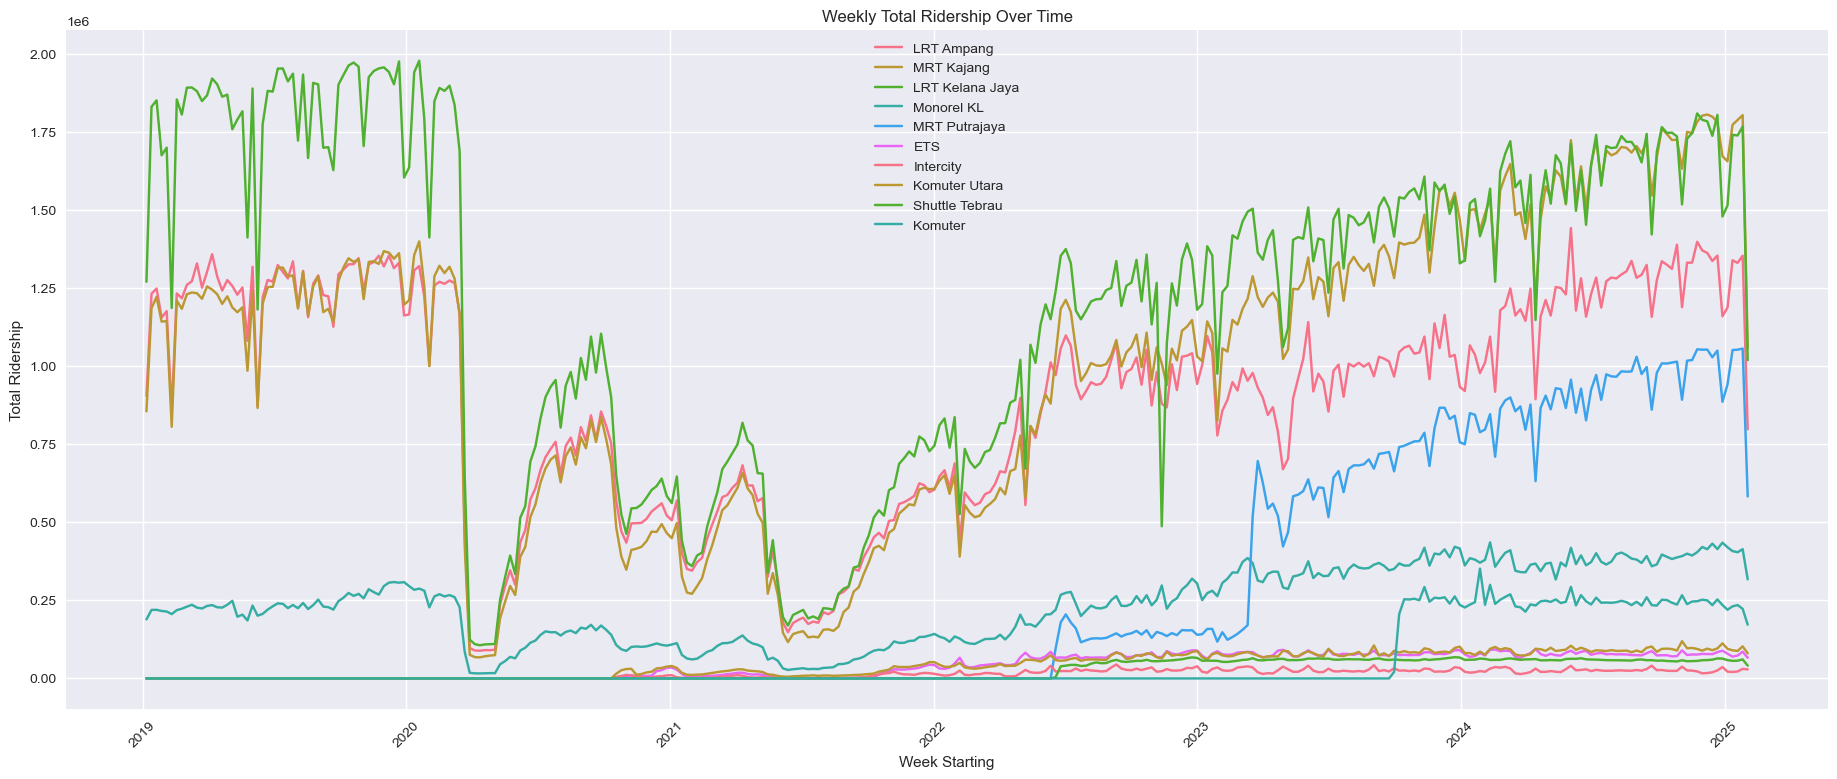

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better-looking plots (with fallback)
try:
    plt.style.use('seaborn-v0_8')
except:
    plt.style.use('default')
sns.set_palette("husl")

# Read the CSV file
file_path = r"C:\Users\USER\Desktop\Visualization\ridership\ridership.csv"
df = pd.read_csv(file_path)

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')

# Identify line columns (all numeric columns except date)
line_columns = [col for col in df.columns if col != 'date' and pd.api.types.is_numeric_dtype(df[col])]

# Resample to weekly data, summing ridership for each line
df_weekly = df.set_index('date').resample('W').sum().reset_index()

# Create a single large figure with all plots
plt.figure(figsize=(50, 30))

# 1. Time Series Plot for all lines (weekly totals)
plt.subplot(3, 2, 1)
for column in line_columns:
    plt.plot(df_weekly['date'], df_weekly[column], label=column)
plt.title('Weekly Total Ridership Over Time')
plt.xlabel('Week Starting')
plt.ylabel('Total Ridership')
plt.legend()
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'LRT Ampang'),
  Text(1, 0, 'MRT Kajang'),
  Text(2, 0, 'LRT Kelana Jaya'),
  Text(3, 0, 'Monorel KL'),
  Text(4, 0, 'MRT Putrajaya'),
  Text(5, 0, 'ETS'),
  Text(6, 0, 'Intercity'),
  Text(7, 0, 'Komuter Utara'),
  Text(8, 0, 'Shuttle Tebrau'),
  Text(9, 0, 'Komuter')])

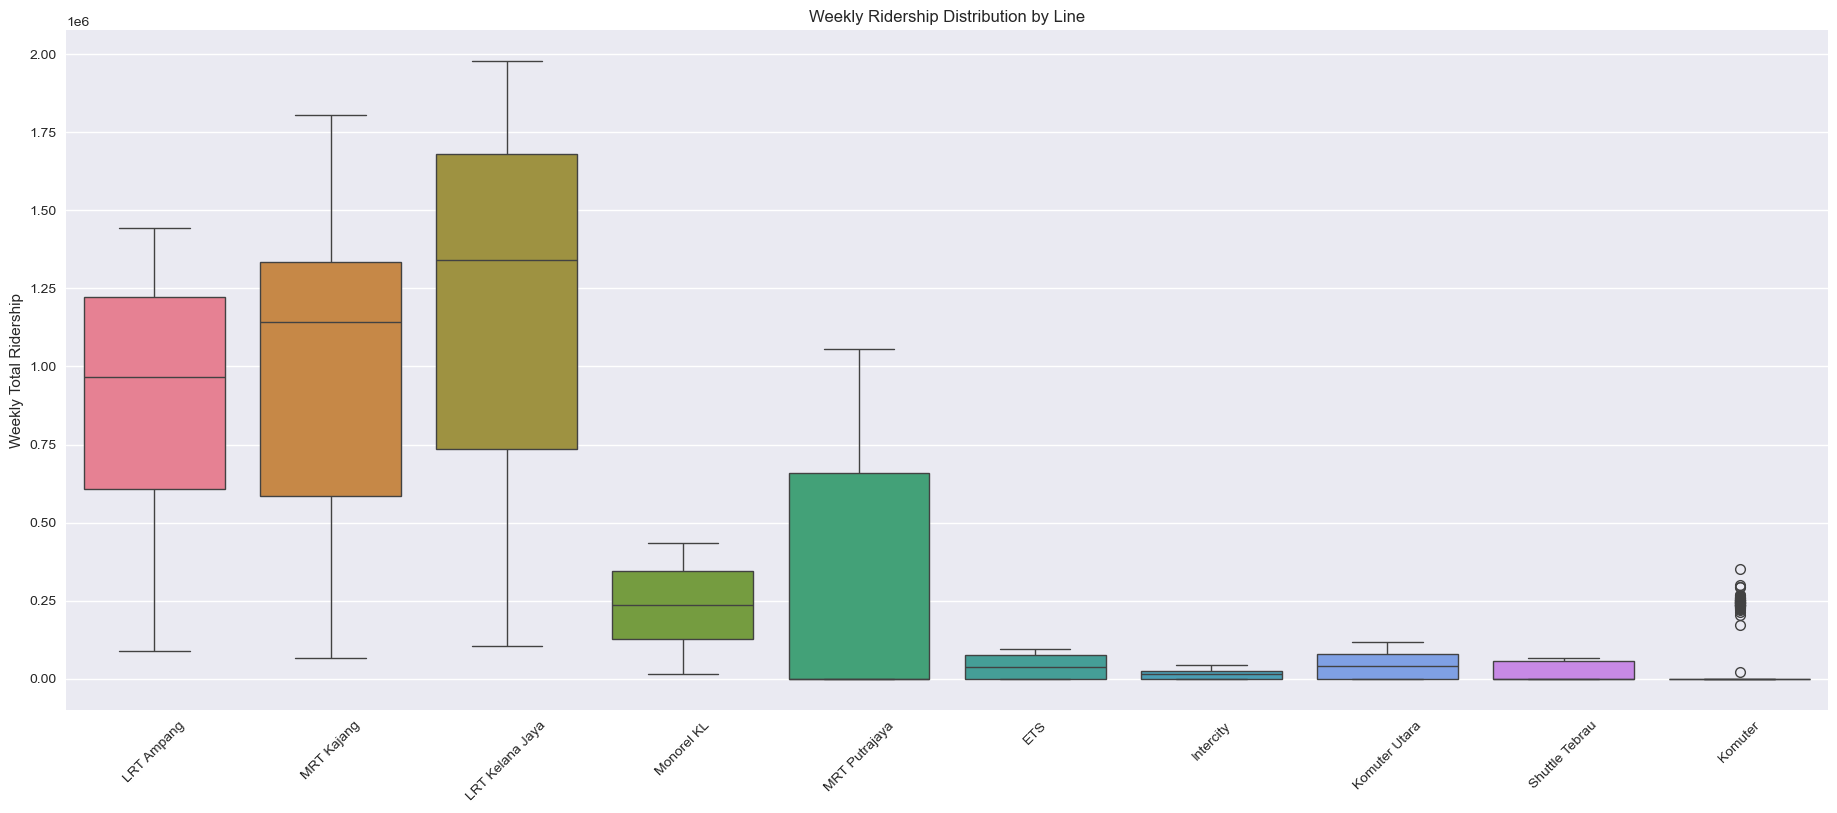

In [37]:
# 2. Box Plot to show distribution of weekly totals
plt.figure(figsize=(50, 30))
plt.subplot(3, 2, 2)
sns.boxplot(data=df_weekly[line_columns])
plt.title('Weekly Ridership Distribution by Line')
plt.ylabel('Weekly Total Ridership')
plt.xticks(rotation=45)

In [41]:
# Add year and month columns for additional analysis
df_weekly['year'] = df_weekly['date'].dt.year
df_weekly['month'] = df_weekly['date'].dt.month


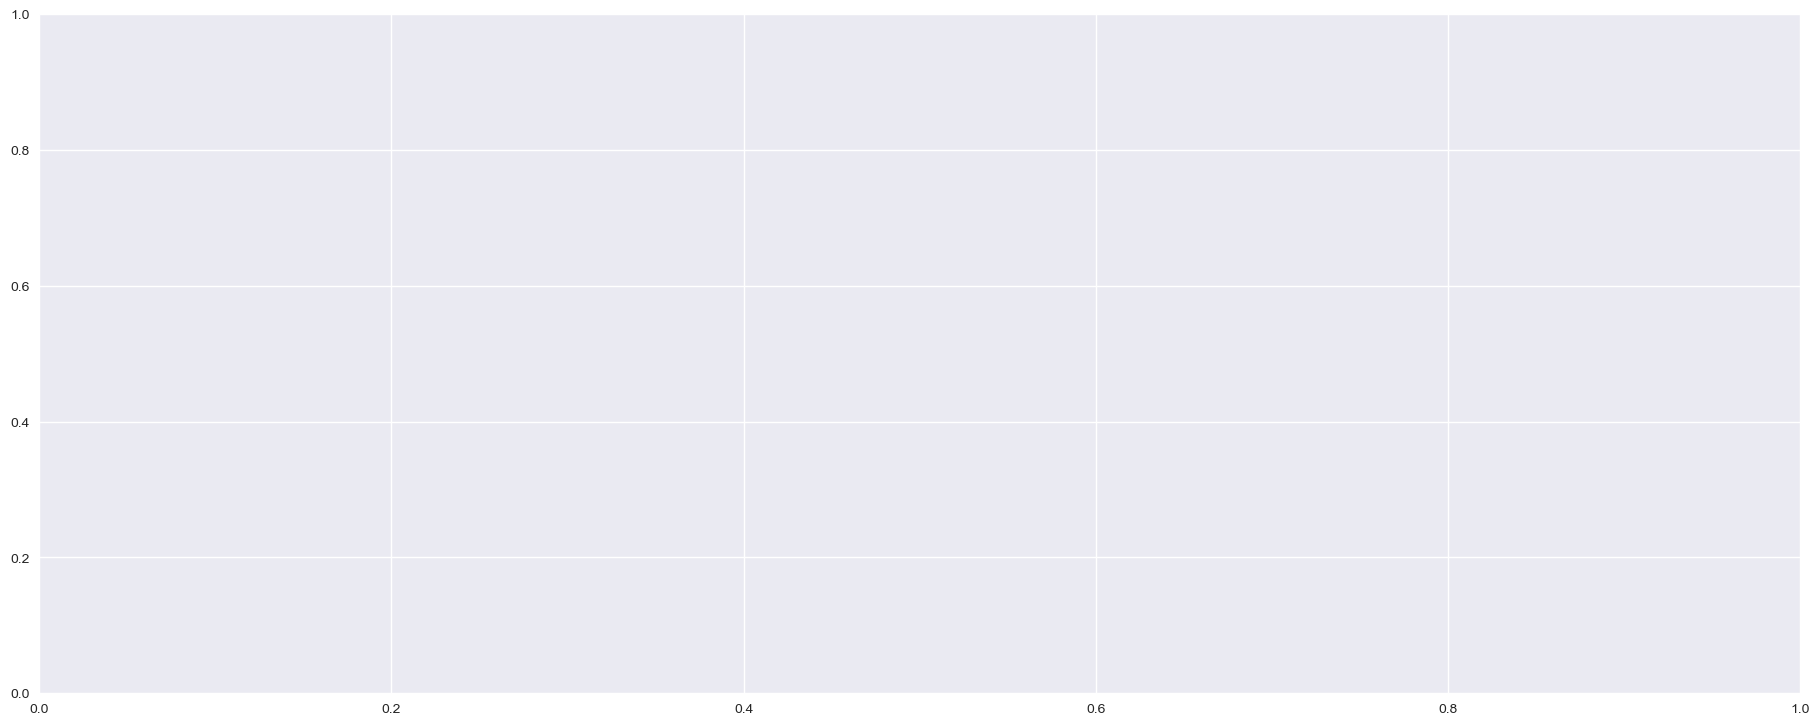

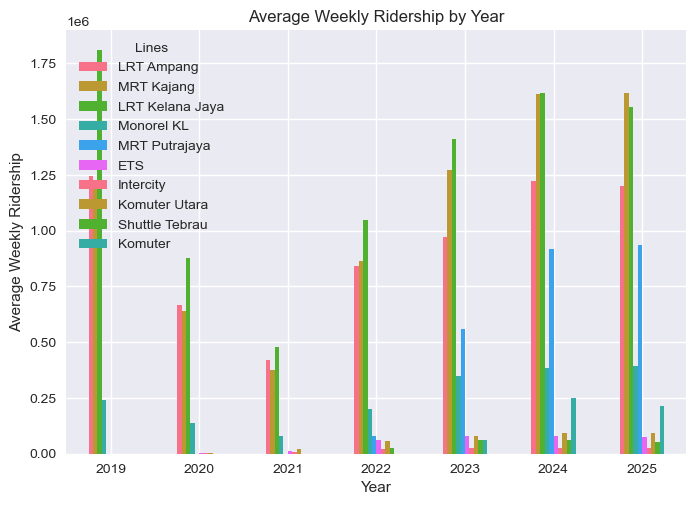

In [43]:
# 3. Yearly Average Ridership (average of weekly totals)
plt.figure(figsize=(50, 30))
plt.subplot(3, 2, 3)
yearly_avg = df_weekly.groupby('year')[line_columns].mean()
yearly_avg.plot(kind='bar')
plt.title('Average Weekly Ridership by Year')
plt.xlabel('Year')
plt.ylabel('Average Weekly Ridership')
plt.xticks(rotation=0)
plt.legend(title='Lines')

Text(2711.3585858585852, 0.5, 'Month')

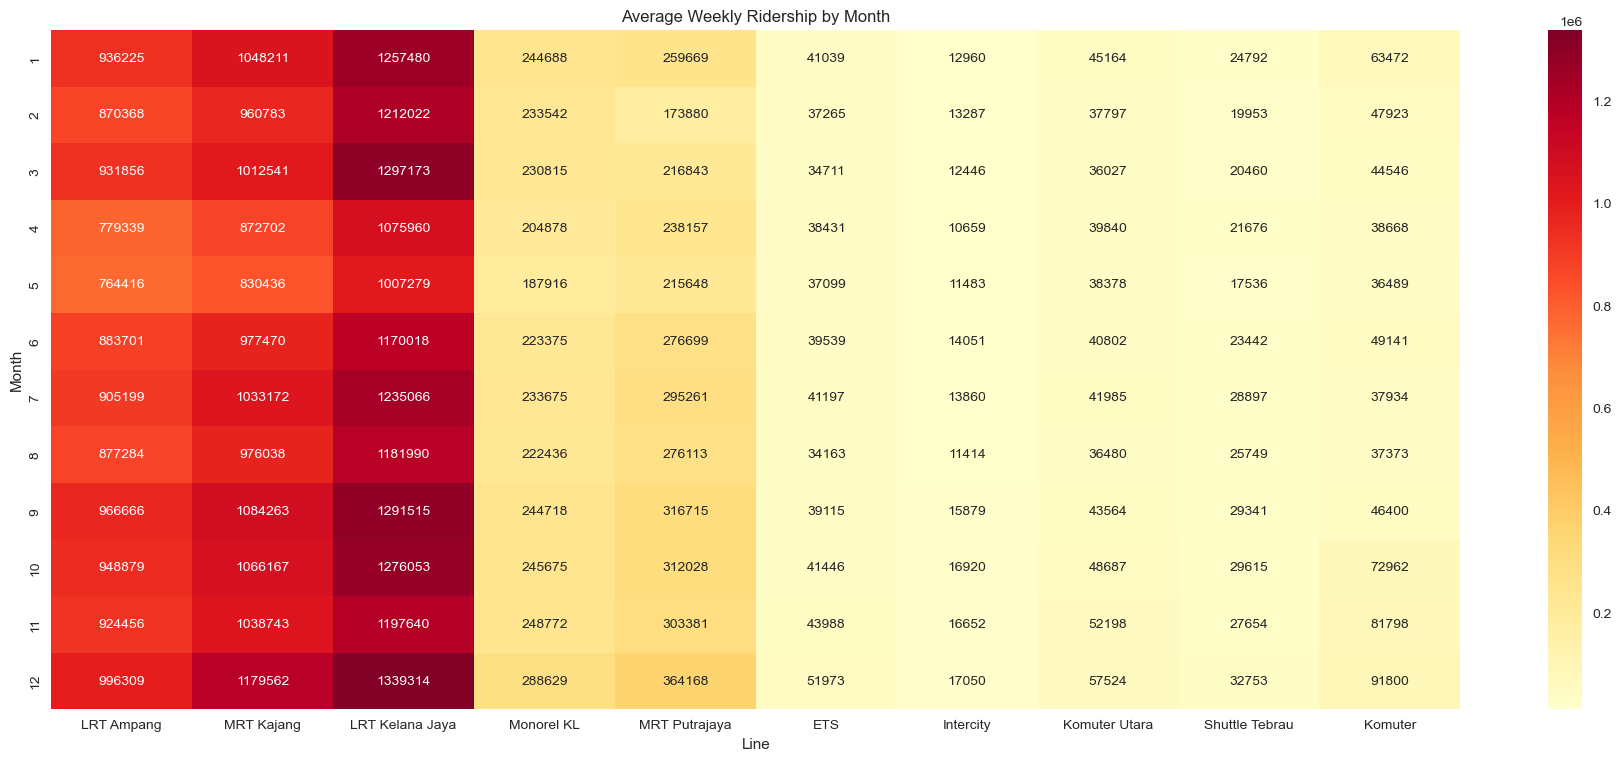

In [45]:
# 4. Monthly Average Ridership (average of weekly totals)
plt.figure(figsize=(50, 30))
plt.subplot(3, 2, 4)
monthly_data = df_weekly.groupby('month')[line_columns].mean()
sns.heatmap(monthly_data, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Average Weekly Ridership by Month')
plt.xlabel('Line')
plt.ylabel('Month')

(array([17532., 17897., 18262., 18628., 18993., 19358., 19723., 20089.]),
 [Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025')])

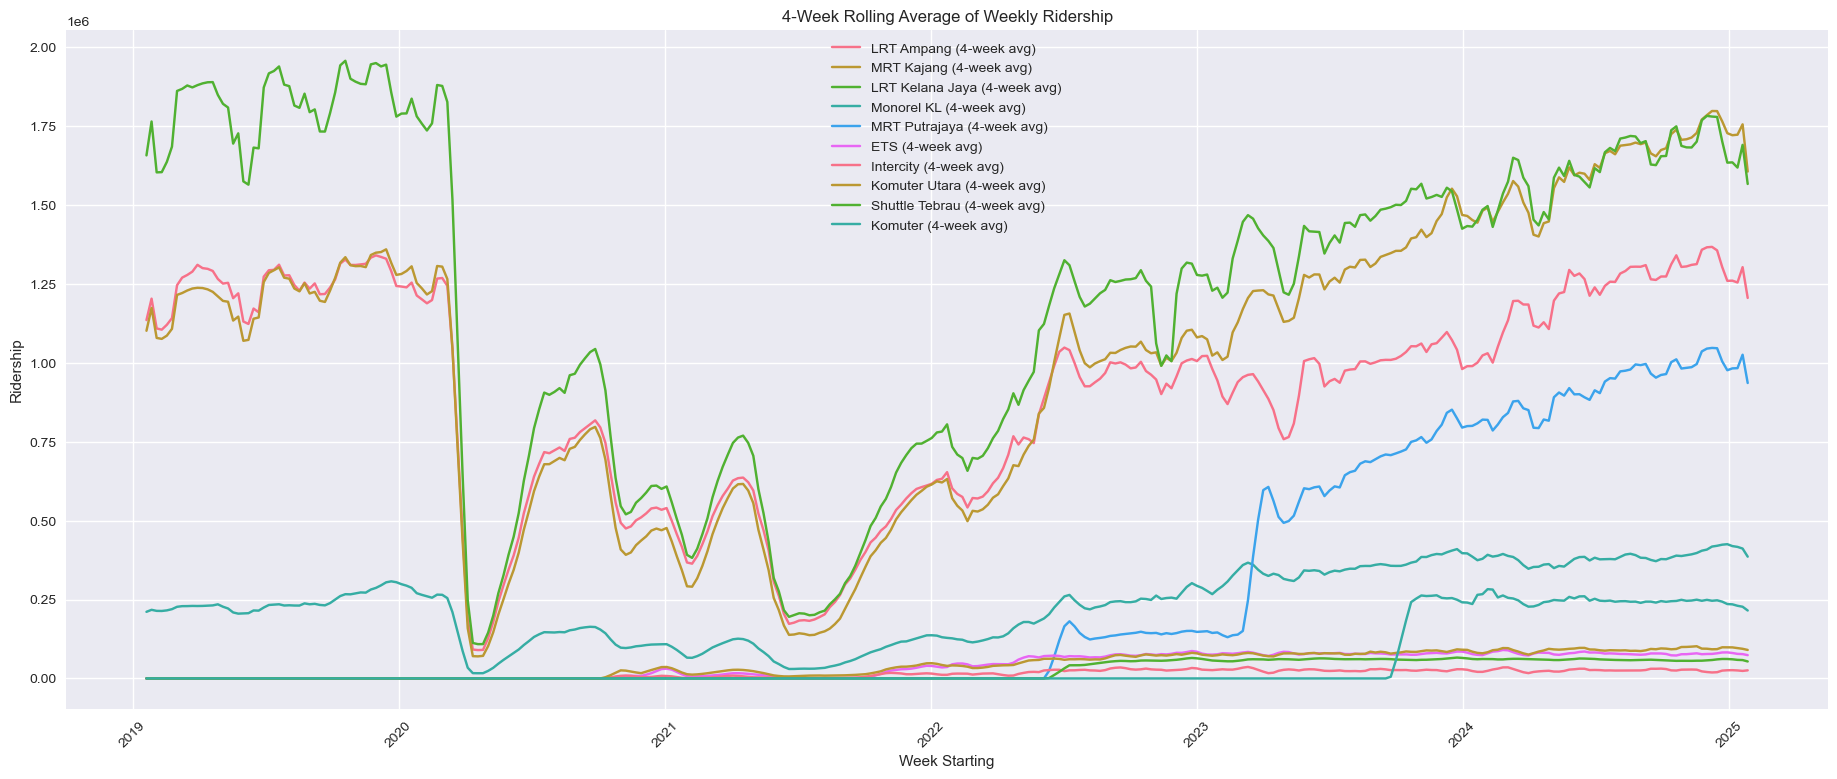

In [47]:
# 5. Rolling Average Plot (4-week moving average of weekly totals)
plt.figure(figsize=(50, 30))
plt.subplot(3, 2, 5)
for column in line_columns:
    rolling_avg = df_weekly[column].rolling(window=4, center=True).mean()
    plt.plot(df_weekly['date'], rolling_avg, label=f'{column} (4-week avg)')
plt.title('4-Week Rolling Average of Weekly Ridership')
plt.xlabel('Week Starting')
plt.ylabel('Ridership')
plt.legend()
plt.xticks(rotation=45)

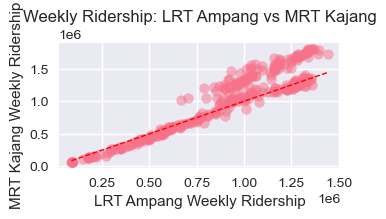

In [31]:
# 6. Ridership Comparison Scatter Plot (first two lines, weekly totals)
if len(line_columns) >= 2:
    plt.subplot(3, 2, 6)
    plt.scatter(df_weekly[line_columns[0]], df_weekly[line_columns[1]], alpha=0.5)
    plt.plot([df_weekly[line_columns[0]].min(), df_weekly[line_columns[0]].max()], 
             [df_weekly[line_columns[0]].min(), df_weekly[line_columns[0]].max()], 
             'r--', lw=1)
    plt.title(f'Weekly Ridership: {line_columns[0]} vs {line_columns[1]}')
    plt.xlabel(f'{line_columns[0]} Weekly Ridership')
    plt.ylabel(f'{line_columns[1]} Weekly Ridership')

In [33]:
# Adjust layout and display
plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

In [35]:
# Print some basic statistics for weekly data
print("\nBasic Statistics (Weekly Totals):")
print(df_weekly[line_columns].describe())


Basic Statistics (Weekly Totals):
         LRT Ampang    MRT Kajang  LRT Kelana Jaya     Monorel KL  \
count  3.180000e+02  3.180000e+02     3.180000e+02     318.000000   
mean   8.998444e+05  1.007987e+06     1.213210e+06  234359.751572   
std    3.512545e+05  4.739884e+05     5.347044e+05  118274.095023   
min    8.861400e+04  6.742500e+04     1.062090e+05   16036.000000   
25%    6.091325e+05  5.839542e+05     7.359422e+05  126254.250000   
50%    9.670525e+05  1.143686e+06     1.340432e+06  234731.000000   
75%    1.223016e+06  1.335296e+06     1.679223e+06  345656.000000   
max    1.442311e+06  1.805613e+06     1.977663e+06  435512.000000   

       MRT Putrajaya           ETS     Intercity  Komuter Utara  \
count   3.180000e+02    318.000000    318.000000     318.000000   
mean    2.709253e+05  40031.050314  13884.500000   43258.330189   
std     3.792779e+05  36366.265342  12867.522602   37619.364883   
min     0.000000e+00      0.000000      0.000000       0.000000   
25%     